In [1]:
import numpy as np

import matplotlib.pyplot as plt


#按照一定规律均匀分布含有两个特征的数据点

def createData(samplecnt,coef=1.0,intercept=0.05):

    x1 = np.random.uniform(0,1,samplecnt)

    x2 = np.random.uniform(0,1,samplecnt)

    index = (x2-intercept)/x1 <coef

    x1_pos = x1[index]

    x2_pos = x2[index]

    index = (x2-intercept)/x1 >=coef

    x1_neg = x1[index]

    x2_neg = x2[index]

    plt.xlabel("w1")

    plt.ylabel("w2")

    plt.scatter(x1_pos,x2_pos)

    plt.scatter(x1_neg,x2_neg)

    regx = np.linspace(0,1,samplecnt)

    regy = coef*regx+intercept

    #plt.plot(regx,regy,color='g')

    plt.show()

    return x1_pos,x1_neg,x2_pos,x2_neg


#组合成原始数据

def combine_data(x1_pos,x1_neg,x2_pos,x2_neg):

    x1_pos_1 = x1_pos.reshape(-1,1)

    x2_pos_1 = x2_pos.reshape(-1,1)

    x_pos = np.concatenate((x1_pos_1,x2_pos_1),axis=1)

    x_pos_shape =  np.shape(x_pos)

    y_pos = np.ones(x_pos_shape[0])

    y_pos = y_pos.reshape(-1,1)

    data_pos = np.concatenate((x_pos,y_pos),axis=1)

    x1_neg_1 = x1_neg.reshape(-1,1)

    x2_neg_1 = x2_neg.reshape(-1,1)

    x_neg = np.concatenate((x1_neg_1,x2_neg_1),axis=1)

    x_neg_shape =  np.shape(x_neg)

    y_neg = np.zeros(x_neg_shape[0])

    y_neg = y_neg.reshape(-1,1)

    data_neg = np.concatenate((x_neg,y_neg),axis=1)

    data = np.vstack((data_pos,data_neg))

    data = np.random.permutation(data)

    return data

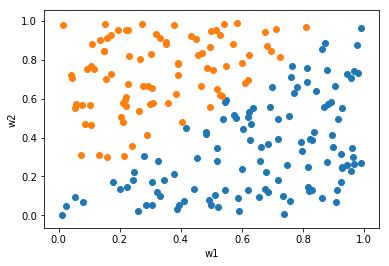

In [2]:
nsamples=200
x1_pos,x1_neg,x2_pos,x2_neg = createData(nsamples)
data = combine_data(x1_pos,x1_neg,x2_pos,x2_neg)

In [11]:
data

array([[ 0.71731701,  0.55757086,  1.        ],
       [ 0.75793834,  0.03612803,  1.        ],
       [ 0.90711227,  0.20779183,  1.        ],
       [ 0.14244352,  0.89462451,  0.        ],
       [ 0.32790844,  0.52764396,  0.        ],
       [ 0.95128786,  0.18999812,  1.        ],
       [ 0.20593193,  0.76267253,  0.        ],
       [ 0.36496953,  0.28299187,  1.        ],
       [ 0.81108057,  0.57739294,  1.        ],
       [ 0.38607318,  0.4707241 ,  0.        ],
       [ 0.11112504,  0.25968073,  0.        ],
       [ 0.24202282,  0.40950386,  0.        ],
       [ 0.79662932,  0.84059388,  1.        ],
       [ 0.92253889,  0.64659843,  1.        ],
       [ 0.02269581,  0.91221962,  0.        ],
       [ 0.71779222,  0.89689684,  0.        ],
       [ 0.16169732,  0.13597035,  1.        ],
       [ 0.39796718,  0.98442934,  0.        ],
       [ 0.41854411,  0.04972994,  1.        ],
       [ 0.78496734,  0.21269298,  1.        ],
       [ 0.04429872,  0.82388025,  0.   

In [8]:
'偏移量 b shape=(nsamples,1)'
b = np.ones(nsamples).reshape(nsamples,1)
data = np.concatenate((b,data),axis=1)

In [9]:
data

array([[  1.00000000e+00,   9.65139265e-01,   7.42232824e-01,
          1.00000000e+00],
       [  1.00000000e+00,   1.07622167e-01,   7.66258076e-01,
          0.00000000e+00],
       [  1.00000000e+00,   1.79338251e-01,   1.70944213e-01,
          1.00000000e+00],
       [  1.00000000e+00,   3.77805067e-01,   2.14615648e-01,
          1.00000000e+00],
       [  1.00000000e+00,   3.91905126e-01,   7.82971006e-01,
          0.00000000e+00],
       [  1.00000000e+00,   3.20225535e-01,   9.35347922e-01,
          0.00000000e+00],
       [  1.00000000e+00,   3.31219940e-01,   1.01458176e-01,
          1.00000000e+00],
       [  1.00000000e+00,   5.53695578e-02,   5.49818343e-01,
          0.00000000e+00],
       [  1.00000000e+00,   5.13437165e-01,   1.04935695e-01,
          1.00000000e+00],
       [  1.00000000e+00,   8.27937068e-01,   1.27866897e-01,
          1.00000000e+00],
       [  1.00000000e+00,   2.99186910e-01,   5.71288171e-01,
          0.00000000e+00],
       [  1.00000000e

In [10]:
'model'
def sigmoid(x):

    return 1/(1+ np.exp(-x))

def model(theta,X):

    theta = np.array(theta)

    return sigmoid( X.dot(theta) )

'cost'
def cost(m,theta,X,y):

    ele = y*np.log(model(theta,X)) + (1-y)*np.log(1-model(theta,X))

    item_sum = np.sum(ele)

    return -item_sum/m

'gradient'
def gradient(m,theta,X,y,cols):

    grad_theta = []

    for j in range(cols):

        grad = (model(theta,X) - y).dot(X[:,j])

        grad_sum = np.sum(grad)    

        grad_theta.append(grad_sum/m)

    return np.array(grad_theta)

'theta update'

def theta_update(grad_theta,theta,sigma):

    return theta - sigma * grad_theta

'stop stratege'

def stop_stratege(cost,cost_update,threshold):

    return cost-cost_update < threshold

'逻辑回归算法'


def LogicRegression(X,y,threshold,m,xcols):

    start = time.clock()

    '设置权重参数的初始值'

    theta = np.zeros(xcols)

    '迭代步数'

    iters = 0;

    '记录代价函数的值'

    cost_record=[]

    '学习率'

    sigma = 0.01

    cost_val = cost(m,theta,X,y)

    cost_record.append(cost_val)

    while True:

        grad = gradient(m,theta,X,y,xcols)

        '参数更新'

        theta = theta_update(grad,theta,sigma)

        cost_update = cost(m,theta,X,y)

        if stop_stratege(cost_val,cost_update,threshold):

            break

        iters=iters+1

        cost_val = cost_update

        print("cost_val:%f" %cost_val)

        cost_record.append(cost_val)

    end = time.clock()

    print("LogicRegressionconvergence duration: %f s" % (end - start))

    return cost_record, iters,theta

In [12]:
import time

In [13]:
cost_record, iters,theta = LogicRegression(data[:,[0,1,2]],data[:,3],0.00001,nsamples,3)

cost_val:0.692937
cost_val:0.692727
cost_val:0.692517
cost_val:0.692308
cost_val:0.692100
cost_val:0.691892
cost_val:0.691684
cost_val:0.691477
cost_val:0.691270
cost_val:0.691064
cost_val:0.690858
cost_val:0.690653
cost_val:0.690448
cost_val:0.690244
cost_val:0.690040
cost_val:0.689836
cost_val:0.689633
cost_val:0.689430
cost_val:0.689228
cost_val:0.689026
cost_val:0.688825
cost_val:0.688624
cost_val:0.688423
cost_val:0.688223
cost_val:0.688023
cost_val:0.687824
cost_val:0.687625
cost_val:0.687427
cost_val:0.687229
cost_val:0.687031
cost_val:0.686833
cost_val:0.686636
cost_val:0.686440
cost_val:0.686244
cost_val:0.686048
cost_val:0.685853
cost_val:0.685658
cost_val:0.685463
cost_val:0.685269
cost_val:0.685075
cost_val:0.684881
cost_val:0.684688
cost_val:0.684495
cost_val:0.684303
cost_val:0.684111
cost_val:0.683919
cost_val:0.683728
cost_val:0.683537
cost_val:0.683346
cost_val:0.683156
cost_val:0.682966
cost_val:0.682776
cost_val:0.682587
cost_val:0.682398
cost_val:0.682209
cost_val:0

cost_val:0.614620
cost_val:0.614493
cost_val:0.614366
cost_val:0.614239
cost_val:0.614112
cost_val:0.613986
cost_val:0.613859
cost_val:0.613733
cost_val:0.613606
cost_val:0.613480
cost_val:0.613354
cost_val:0.613228
cost_val:0.613101
cost_val:0.612975
cost_val:0.612849
cost_val:0.612723
cost_val:0.612597
cost_val:0.612471
cost_val:0.612346
cost_val:0.612220
cost_val:0.612094
cost_val:0.611969
cost_val:0.611843
cost_val:0.611718
cost_val:0.611592
cost_val:0.611467
cost_val:0.611341
cost_val:0.611216
cost_val:0.611091
cost_val:0.610966
cost_val:0.610841
cost_val:0.610716
cost_val:0.610591
cost_val:0.610466
cost_val:0.610341
cost_val:0.610216
cost_val:0.610092
cost_val:0.609967
cost_val:0.609842
cost_val:0.609718
cost_val:0.609594
cost_val:0.609469
cost_val:0.609345
cost_val:0.609220
cost_val:0.609096
cost_val:0.608972
cost_val:0.608848
cost_val:0.608724
cost_val:0.608600
cost_val:0.608476
cost_val:0.608352
cost_val:0.608228
cost_val:0.608105
cost_val:0.607981
cost_val:0.607857
cost_val:0

cost_val:0.526272
cost_val:0.526184
cost_val:0.526096
cost_val:0.526008
cost_val:0.525919
cost_val:0.525831
cost_val:0.525743
cost_val:0.525655
cost_val:0.525567
cost_val:0.525479
cost_val:0.525391
cost_val:0.525303
cost_val:0.525215
cost_val:0.525127
cost_val:0.525039
cost_val:0.524951
cost_val:0.524863
cost_val:0.524775
cost_val:0.524688
cost_val:0.524600
cost_val:0.524512
cost_val:0.524425
cost_val:0.524337
cost_val:0.524250
cost_val:0.524162
cost_val:0.524074
cost_val:0.523987
cost_val:0.523900
cost_val:0.523812
cost_val:0.523725
cost_val:0.523638
cost_val:0.523550
cost_val:0.523463
cost_val:0.523376
cost_val:0.523289
cost_val:0.523202
cost_val:0.523114
cost_val:0.523027
cost_val:0.522940
cost_val:0.522853
cost_val:0.522766
cost_val:0.522679
cost_val:0.522593
cost_val:0.522506
cost_val:0.522419
cost_val:0.522332
cost_val:0.522245
cost_val:0.522159
cost_val:0.522072
cost_val:0.521985
cost_val:0.521899
cost_val:0.521812
cost_val:0.521726
cost_val:0.521639
cost_val:0.521553
cost_val:0

cost_val:0.478112
cost_val:0.478043
cost_val:0.477973
cost_val:0.477904
cost_val:0.477834
cost_val:0.477765
cost_val:0.477695
cost_val:0.477626
cost_val:0.477557
cost_val:0.477488
cost_val:0.477418
cost_val:0.477349
cost_val:0.477280
cost_val:0.477211
cost_val:0.477141
cost_val:0.477072
cost_val:0.477003
cost_val:0.476934
cost_val:0.476865
cost_val:0.476796
cost_val:0.476727
cost_val:0.476658
cost_val:0.476589
cost_val:0.476520
cost_val:0.476451
cost_val:0.476382
cost_val:0.476314
cost_val:0.476245
cost_val:0.476176
cost_val:0.476107
cost_val:0.476038
cost_val:0.475970
cost_val:0.475901
cost_val:0.475832
cost_val:0.475764
cost_val:0.475695
cost_val:0.475626
cost_val:0.475558
cost_val:0.475489
cost_val:0.475421
cost_val:0.475352
cost_val:0.475284
cost_val:0.475215
cost_val:0.475147
cost_val:0.475079
cost_val:0.475010
cost_val:0.474942
cost_val:0.474874
cost_val:0.474805
cost_val:0.474737
cost_val:0.474669
cost_val:0.474601
cost_val:0.474532
cost_val:0.474464
cost_val:0.474396
cost_val:0

cost_val:0.435742
cost_val:0.435688
cost_val:0.435634
cost_val:0.435579
cost_val:0.435525
cost_val:0.435471
cost_val:0.435416
cost_val:0.435362
cost_val:0.435308
cost_val:0.435254
cost_val:0.435200
cost_val:0.435145
cost_val:0.435091
cost_val:0.435037
cost_val:0.434983
cost_val:0.434929
cost_val:0.434875
cost_val:0.434821
cost_val:0.434767
cost_val:0.434713
cost_val:0.434659
cost_val:0.434605
cost_val:0.434551
cost_val:0.434497
cost_val:0.434443
cost_val:0.434389
cost_val:0.434335
cost_val:0.434282
cost_val:0.434228
cost_val:0.434174
cost_val:0.434120
cost_val:0.434066
cost_val:0.434012
cost_val:0.433959
cost_val:0.433905
cost_val:0.433851
cost_val:0.433798
cost_val:0.433744
cost_val:0.433690
cost_val:0.433637
cost_val:0.433583
cost_val:0.433529
cost_val:0.433476
cost_val:0.433422
cost_val:0.433369
cost_val:0.433315
cost_val:0.433262
cost_val:0.433208
cost_val:0.433155
cost_val:0.433101
cost_val:0.433048
cost_val:0.432994
cost_val:0.432941
cost_val:0.432888
cost_val:0.432834
cost_val:0

cost_val:0.407689
cost_val:0.407644
cost_val:0.407599
cost_val:0.407554
cost_val:0.407509
cost_val:0.407464
cost_val:0.407418
cost_val:0.407373
cost_val:0.407328
cost_val:0.407283
cost_val:0.407238
cost_val:0.407193
cost_val:0.407148
cost_val:0.407103
cost_val:0.407058
cost_val:0.407013
cost_val:0.406968
cost_val:0.406923
cost_val:0.406878
cost_val:0.406833
cost_val:0.406788
cost_val:0.406744
cost_val:0.406699
cost_val:0.406654
cost_val:0.406609
cost_val:0.406564
cost_val:0.406519
cost_val:0.406474
cost_val:0.406430
cost_val:0.406385
cost_val:0.406340
cost_val:0.406295
cost_val:0.406251
cost_val:0.406206
cost_val:0.406161
cost_val:0.406116
cost_val:0.406072
cost_val:0.406027
cost_val:0.405982
cost_val:0.405938
cost_val:0.405893
cost_val:0.405848
cost_val:0.405804
cost_val:0.405759
cost_val:0.405715
cost_val:0.405670
cost_val:0.405626
cost_val:0.405581
cost_val:0.405536
cost_val:0.405492
cost_val:0.405447
cost_val:0.405403
cost_val:0.405359
cost_val:0.405314
cost_val:0.405270
cost_val:0

cost_val:0.388457
cost_val:0.388418
cost_val:0.388378
cost_val:0.388339
cost_val:0.388300
cost_val:0.388261
cost_val:0.388221
cost_val:0.388182
cost_val:0.388143
cost_val:0.388103
cost_val:0.388064
cost_val:0.388025
cost_val:0.387986
cost_val:0.387946
cost_val:0.387907
cost_val:0.387868
cost_val:0.387829
cost_val:0.387790
cost_val:0.387751
cost_val:0.387711
cost_val:0.387672
cost_val:0.387633
cost_val:0.387594
cost_val:0.387555
cost_val:0.387516
cost_val:0.387477
cost_val:0.387438
cost_val:0.387399
cost_val:0.387360
cost_val:0.387321
cost_val:0.387281
cost_val:0.387242
cost_val:0.387203
cost_val:0.387164
cost_val:0.387126
cost_val:0.387087
cost_val:0.387048
cost_val:0.387009
cost_val:0.386970
cost_val:0.386931
cost_val:0.386892
cost_val:0.386853
cost_val:0.386814
cost_val:0.386775
cost_val:0.386736
cost_val:0.386697
cost_val:0.386659
cost_val:0.386620
cost_val:0.386581
cost_val:0.386542
cost_val:0.386503
cost_val:0.386465
cost_val:0.386426
cost_val:0.386387
cost_val:0.386348
cost_val:0

cost_val:0.368422
cost_val:0.368388
cost_val:0.368355
cost_val:0.368321
cost_val:0.368287
cost_val:0.368254
cost_val:0.368220
cost_val:0.368186
cost_val:0.368153
cost_val:0.368119
cost_val:0.368085
cost_val:0.368052
cost_val:0.368018
cost_val:0.367985
cost_val:0.367951
cost_val:0.367917
cost_val:0.367884
cost_val:0.367850
cost_val:0.367817
cost_val:0.367783
cost_val:0.367750
cost_val:0.367716
cost_val:0.367683
cost_val:0.367649
cost_val:0.367616
cost_val:0.367582
cost_val:0.367549
cost_val:0.367515
cost_val:0.367482
cost_val:0.367448
cost_val:0.367415
cost_val:0.367381
cost_val:0.367348
cost_val:0.367314
cost_val:0.367281
cost_val:0.367248
cost_val:0.367214
cost_val:0.367181
cost_val:0.367148
cost_val:0.367114
cost_val:0.367081
cost_val:0.367047
cost_val:0.367014
cost_val:0.366981
cost_val:0.366947
cost_val:0.366914
cost_val:0.366881
cost_val:0.366848
cost_val:0.366814
cost_val:0.366781
cost_val:0.366748
cost_val:0.366715
cost_val:0.366681
cost_val:0.366648
cost_val:0.366615
cost_val:0

cost_val:0.351224
cost_val:0.351194
cost_val:0.351165
cost_val:0.351136
cost_val:0.351107
cost_val:0.351078
cost_val:0.351048
cost_val:0.351019
cost_val:0.350990
cost_val:0.350961
cost_val:0.350932
cost_val:0.350903
cost_val:0.350874
cost_val:0.350844
cost_val:0.350815
cost_val:0.350786
cost_val:0.350757
cost_val:0.350728
cost_val:0.350699
cost_val:0.350670
cost_val:0.350641
cost_val:0.350612
cost_val:0.350583
cost_val:0.350554
cost_val:0.350525
cost_val:0.350496
cost_val:0.350466
cost_val:0.350437
cost_val:0.350408
cost_val:0.350379
cost_val:0.350350
cost_val:0.350321
cost_val:0.350292
cost_val:0.350263
cost_val:0.350234
cost_val:0.350206
cost_val:0.350177
cost_val:0.350148
cost_val:0.350119
cost_val:0.350090
cost_val:0.350061
cost_val:0.350032
cost_val:0.350003
cost_val:0.349974
cost_val:0.349945
cost_val:0.349916
cost_val:0.349887
cost_val:0.349858
cost_val:0.349830
cost_val:0.349801
cost_val:0.349772
cost_val:0.349743
cost_val:0.349714
cost_val:0.349685
cost_val:0.349657
cost_val:0

cost_val:0.336781
cost_val:0.336755
cost_val:0.336730
cost_val:0.336704
cost_val:0.336678
cost_val:0.336653
cost_val:0.336627
cost_val:0.336601
cost_val:0.336576
cost_val:0.336550
cost_val:0.336524
cost_val:0.336499
cost_val:0.336473
cost_val:0.336447
cost_val:0.336422
cost_val:0.336396
cost_val:0.336371
cost_val:0.336345
cost_val:0.336319
cost_val:0.336294
cost_val:0.336268
cost_val:0.336243
cost_val:0.336217
cost_val:0.336191
cost_val:0.336166
cost_val:0.336140
cost_val:0.336115
cost_val:0.336089
cost_val:0.336064
cost_val:0.336038
cost_val:0.336013
cost_val:0.335987
cost_val:0.335962
cost_val:0.335936
cost_val:0.335910
cost_val:0.335885
cost_val:0.335860
cost_val:0.335834
cost_val:0.335809
cost_val:0.335783
cost_val:0.335758
cost_val:0.335732
cost_val:0.335707
cost_val:0.335681
cost_val:0.335656
cost_val:0.335630
cost_val:0.335605
cost_val:0.335579
cost_val:0.335554
cost_val:0.335529
cost_val:0.335503
cost_val:0.335478
cost_val:0.335452
cost_val:0.335427
cost_val:0.335402
cost_val:0

cost_val:0.324776
cost_val:0.324753
cost_val:0.324730
cost_val:0.324707
cost_val:0.324684
cost_val:0.324661
cost_val:0.324639
cost_val:0.324616
cost_val:0.324593
cost_val:0.324570
cost_val:0.324547
cost_val:0.324524
cost_val:0.324501
cost_val:0.324478
cost_val:0.324455
cost_val:0.324432
cost_val:0.324409
cost_val:0.324386
cost_val:0.324364
cost_val:0.324341
cost_val:0.324318
cost_val:0.324295
cost_val:0.324272
cost_val:0.324249
cost_val:0.324226
cost_val:0.324204
cost_val:0.324181
cost_val:0.324158
cost_val:0.324135
cost_val:0.324112
cost_val:0.324089
cost_val:0.324067
cost_val:0.324044
cost_val:0.324021
cost_val:0.323998
cost_val:0.323975
cost_val:0.323952
cost_val:0.323930
cost_val:0.323907
cost_val:0.323884
cost_val:0.323861
cost_val:0.323839
cost_val:0.323816
cost_val:0.323793
cost_val:0.323770
cost_val:0.323748
cost_val:0.323725
cost_val:0.323702
cost_val:0.323679
cost_val:0.323657
cost_val:0.323634
cost_val:0.323611
cost_val:0.323588
cost_val:0.323566
cost_val:0.323543
cost_val:0

cost_val:0.308838
cost_val:0.308818
cost_val:0.308799
cost_val:0.308779
cost_val:0.308760
cost_val:0.308740
cost_val:0.308721
cost_val:0.308701
cost_val:0.308681
cost_val:0.308662
cost_val:0.308642
cost_val:0.308623
cost_val:0.308603
cost_val:0.308584
cost_val:0.308564
cost_val:0.308544
cost_val:0.308525
cost_val:0.308505
cost_val:0.308486
cost_val:0.308466
cost_val:0.308447
cost_val:0.308427
cost_val:0.308408
cost_val:0.308388
cost_val:0.308369
cost_val:0.308349
cost_val:0.308330
cost_val:0.308310
cost_val:0.308291
cost_val:0.308271
cost_val:0.308252
cost_val:0.308232
cost_val:0.308213
cost_val:0.308193
cost_val:0.308174
cost_val:0.308154
cost_val:0.308135
cost_val:0.308115
cost_val:0.308096
cost_val:0.308076
cost_val:0.308057
cost_val:0.308037
cost_val:0.308018
cost_val:0.307999
cost_val:0.307979
cost_val:0.307960
cost_val:0.307940
cost_val:0.307921
cost_val:0.307901
cost_val:0.307882
cost_val:0.307863
cost_val:0.307843
cost_val:0.307824
cost_val:0.307804
cost_val:0.307785
cost_val:0

cost_val:0.294856
cost_val:0.294839
cost_val:0.294822
cost_val:0.294805
cost_val:0.294788
cost_val:0.294772
cost_val:0.294755
cost_val:0.294738
cost_val:0.294721
cost_val:0.294704
cost_val:0.294687
cost_val:0.294670
cost_val:0.294653
cost_val:0.294637
cost_val:0.294620
cost_val:0.294603
cost_val:0.294586
cost_val:0.294569
cost_val:0.294552
cost_val:0.294535
cost_val:0.294519
cost_val:0.294502
cost_val:0.294485
cost_val:0.294468
cost_val:0.294451
cost_val:0.294434
cost_val:0.294418
cost_val:0.294401
cost_val:0.294384
cost_val:0.294367
cost_val:0.294350
cost_val:0.294333
cost_val:0.294317
cost_val:0.294300
cost_val:0.294283
cost_val:0.294266
cost_val:0.294249
cost_val:0.294233
cost_val:0.294216
cost_val:0.294199
cost_val:0.294182
cost_val:0.294165
cost_val:0.294149
cost_val:0.294132
cost_val:0.294115
cost_val:0.294098
cost_val:0.294082
cost_val:0.294065
cost_val:0.294048
cost_val:0.294031
cost_val:0.294015
cost_val:0.293998
cost_val:0.293981
cost_val:0.293964
cost_val:0.293948
cost_val:0

cost_val:0.282700
cost_val:0.282685
cost_val:0.282670
cost_val:0.282655
cost_val:0.282641
cost_val:0.282626
cost_val:0.282611
cost_val:0.282596
cost_val:0.282582
cost_val:0.282567
cost_val:0.282552
cost_val:0.282538
cost_val:0.282523
cost_val:0.282508
cost_val:0.282493
cost_val:0.282479
cost_val:0.282464
cost_val:0.282449
cost_val:0.282435
cost_val:0.282420
cost_val:0.282405
cost_val:0.282390
cost_val:0.282376
cost_val:0.282361
cost_val:0.282346
cost_val:0.282332
cost_val:0.282317
cost_val:0.282302
cost_val:0.282288
cost_val:0.282273
cost_val:0.282258
cost_val:0.282244
cost_val:0.282229
cost_val:0.282214
cost_val:0.282200
cost_val:0.282185
cost_val:0.282170
cost_val:0.282156
cost_val:0.282141
cost_val:0.282126
cost_val:0.282112
cost_val:0.282097
cost_val:0.282082
cost_val:0.282068
cost_val:0.282053
cost_val:0.282039
cost_val:0.282024
cost_val:0.282009
cost_val:0.281995
cost_val:0.281980
cost_val:0.281965
cost_val:0.281951
cost_val:0.281936
cost_val:0.281922
cost_val:0.281907
cost_val:0

cost_val:0.275046
cost_val:0.275032
cost_val:0.275019
cost_val:0.275005
cost_val:0.274992
cost_val:0.274978
cost_val:0.274965
cost_val:0.274951
cost_val:0.274938
cost_val:0.274924
cost_val:0.274911
cost_val:0.274897
cost_val:0.274884
cost_val:0.274871
cost_val:0.274857
cost_val:0.274844
cost_val:0.274830
cost_val:0.274817
cost_val:0.274803
cost_val:0.274790
cost_val:0.274776
cost_val:0.274763
cost_val:0.274750
cost_val:0.274736
cost_val:0.274723
cost_val:0.274709
cost_val:0.274696
cost_val:0.274682
cost_val:0.274669
cost_val:0.274656
cost_val:0.274642
cost_val:0.274629
cost_val:0.274615
cost_val:0.274602
cost_val:0.274589
cost_val:0.274575
cost_val:0.274562
cost_val:0.274548
cost_val:0.274535
cost_val:0.274522
cost_val:0.274508
cost_val:0.274495
cost_val:0.274481
cost_val:0.274468
cost_val:0.274455
cost_val:0.274441
cost_val:0.274428
cost_val:0.274415
cost_val:0.274401
cost_val:0.274388
cost_val:0.274374
cost_val:0.274361
cost_val:0.274348
cost_val:0.274334
cost_val:0.274321
cost_val:0

cost_val:0.267899
cost_val:0.267886
cost_val:0.267874
cost_val:0.267862
cost_val:0.267849
cost_val:0.267837
cost_val:0.267825
cost_val:0.267812
cost_val:0.267800
cost_val:0.267788
cost_val:0.267775
cost_val:0.267763
cost_val:0.267751
cost_val:0.267738
cost_val:0.267726
cost_val:0.267714
cost_val:0.267701
cost_val:0.267689
cost_val:0.267677
cost_val:0.267664
cost_val:0.267652
cost_val:0.267640
cost_val:0.267627
cost_val:0.267615
cost_val:0.267603
cost_val:0.267591
cost_val:0.267578
cost_val:0.267566
cost_val:0.267554
cost_val:0.267541
cost_val:0.267529
cost_val:0.267517
cost_val:0.267504
cost_val:0.267492
cost_val:0.267480
cost_val:0.267468
cost_val:0.267455
cost_val:0.267443
cost_val:0.267431
cost_val:0.267418
cost_val:0.267406
cost_val:0.267394
cost_val:0.267382
cost_val:0.267369
cost_val:0.267357
cost_val:0.267345
cost_val:0.267333
cost_val:0.267320
cost_val:0.267308
cost_val:0.267296
cost_val:0.267284
cost_val:0.267271
cost_val:0.267259
cost_val:0.267247
cost_val:0.267235
cost_val:0

cost_val:0.260892
cost_val:0.260880
cost_val:0.260869
cost_val:0.260858
cost_val:0.260846
cost_val:0.260835
cost_val:0.260824
cost_val:0.260813
cost_val:0.260801
cost_val:0.260790
cost_val:0.260779
cost_val:0.260767
cost_val:0.260756
cost_val:0.260745
cost_val:0.260733
cost_val:0.260722
cost_val:0.260711
cost_val:0.260700
cost_val:0.260688
cost_val:0.260677
cost_val:0.260666
cost_val:0.260655
cost_val:0.260643
cost_val:0.260632
cost_val:0.260621
cost_val:0.260609
cost_val:0.260598
cost_val:0.260587
cost_val:0.260576
cost_val:0.260564
cost_val:0.260553
cost_val:0.260542
cost_val:0.260531
cost_val:0.260519
cost_val:0.260508
cost_val:0.260497
cost_val:0.260486
cost_val:0.260474
cost_val:0.260463
cost_val:0.260452
cost_val:0.260441
cost_val:0.260429
cost_val:0.260418
cost_val:0.260407
cost_val:0.260396
cost_val:0.260384
cost_val:0.260373
cost_val:0.260362
cost_val:0.260351
cost_val:0.260340
cost_val:0.260328
cost_val:0.260317
cost_val:0.260306
cost_val:0.260295
cost_val:0.260283
cost_val:0

cost_val:0.255890
cost_val:0.255879
cost_val:0.255869
cost_val:0.255858
cost_val:0.255848
cost_val:0.255837
cost_val:0.255826
cost_val:0.255816
cost_val:0.255805
cost_val:0.255795
cost_val:0.255784
cost_val:0.255774
cost_val:0.255763
cost_val:0.255752
cost_val:0.255742
cost_val:0.255731
cost_val:0.255721
cost_val:0.255710
cost_val:0.255700
cost_val:0.255689
cost_val:0.255678
cost_val:0.255668
cost_val:0.255657
cost_val:0.255647
cost_val:0.255636
cost_val:0.255626
cost_val:0.255615
cost_val:0.255604
cost_val:0.255594
cost_val:0.255583
cost_val:0.255573
cost_val:0.255562
cost_val:0.255552
cost_val:0.255541
cost_val:0.255531
cost_val:0.255520
cost_val:0.255510
cost_val:0.255499
cost_val:0.255488
cost_val:0.255478
cost_val:0.255467
cost_val:0.255457
cost_val:0.255446
cost_val:0.255436
cost_val:0.255425
cost_val:0.255415
cost_val:0.255404
cost_val:0.255394
cost_val:0.255383
cost_val:0.255373
cost_val:0.255362
cost_val:0.255352
cost_val:0.255341
cost_val:0.255331
cost_val:0.255320
cost_val:0

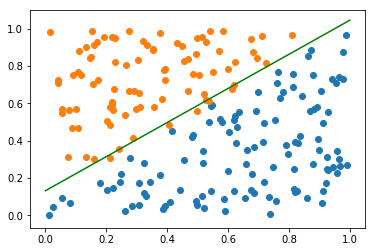

In [14]:
plt.scatter(x1_pos,x2_pos)

plt.scatter(x1_neg,x2_neg)

wp = np.linspace(0.0,1.0,200)

plt.plot(wp,-(theta[0]+theta[1]*wp)/theta[2],color='g')

plt.show()